# SciPy


<img src="./images/scipy.jpg" width="360" height="240" align="center"/>

## Introducción

`SciPy` se basa en el marco `NumPy` de bajo nivel para matrices multidimensionales y proporciona una gran cantidad de algoritmos científicos de alto nivel. Algunos de los temas que cubre SciPy son:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))



Cada uno de estos submódulos proporciona una serie de funciones y clases que se pueden utilizar para resolver problemas en sus respectivos temas.

En esta lección veremos cómo usar algunos de estos subpaquetes.

Para acceder al paquete SciPy en un programa Python, comenzamos importando todo desde el módulo `scipy`.

In [1]:
from scipy import *

Si solo necesitamos usar parte del marco SciPy, podemos incluir selectivamente solo aquellos módulos que nos interesan. Por ejemplo, para incluir el paquete de álgebra lineal bajo el nombre `la`, podemos hacer:

In [2]:
import scipy.linalg as la

## Special functions

Un gran número de funciones matemáticas especiales son importantes para muchos problemas de física computacional. SciPy proporciona implementaciones de un conjunto muy extenso de funciones especiales. Para obtener más detalles, consulte la lista de funciones en el documento de referencia en http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special.

Para demostrar el uso típico de funciones especiales, veremos con más detalle las funciones de Bessel:

In [3]:
#
# The scipy.special module includes a large number of Bessel-functions
# Here we will use the functions jn and yn, which are the Bessel functions 
# of the first and second kind and real-valued order. We also include the 
# function jn_zeros and yn_zeros that gives the zeroes of the functions jn
# and yn.
#
from scipy.special import jn, yn, jn_zeros, yn_zeros
import numpy as np
import matplotlib.pyplot as plt

In [4]:
n = 0    # order
x = 0.0

# Bessel function of first kind
print( f"J_{n}({x}) = {jn(n, x)}")

J_0(0.0) = 1.0


In [5]:
x = 1.0
# Bessel function of second kind
print( f"Y_{n}({x}) = {yn(n, x)}")

Y_0(1.0) = 0.08825696421567697


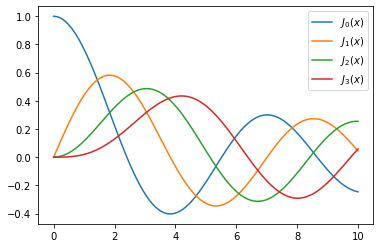

In [6]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();
plt.show()

In [7]:
# zeros of Bessel functions
n = 0 # order
m = 4 # number of roots to compute
jn_zeros(n, m)

array([ 2.40482556,  5.52007811,  8.65372791, 11.79153444])

## Integration

### Numerical integration: quadrature

Evaluación numérica de una función del tipo
$\displaystyle \int_a^b f(x) dx$

se llama *cuadratura numérica*, o simplemente *cuadratura*. SciPy proporciona una serie de funciones para diferentes tipos de cuadratura, por ejemplo, `quad`,` dblquad` y `tplquad` para integrales simples, dobles y triples, respectivamente.



In [8]:
from scipy.integrate import quad, dblquad, tplquad

La función `quad` toma una gran cantidad de argumentos opcionales, que se pueden usar para ajustar el comportamiento de la función (prueba con` help (quad) `para obtener más detalles).

El uso básico es el siguiente:

In [9]:
# define a simple function for the integrand
def f(x):
    return x

In [10]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print(f"integral value = {val} absolute error = {abserr}" )

integral value = 0.5 absolute error = 5.551115123125783e-15


Si necesitamos pasar argumentos adicionales a la función integrando, podemos usar el argumento de palabra clave `args`:

In [11]:
def integrand(x, n):
    """
    Bessel function of first kind and order n. 
    """
    return jn(n, x)


x_lower = 0  # the lower limit of x
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print(val, abserr )

0.7366751370811073 9.389126882496403e-13


Para funciones simples, podemos usar una función lambda (función sin nombre) en lugar de definir explícitamente una función para el integrando:

In [12]:
val, abserr = quad(lambda x: np.exp(-x ** 2), -Inf, Inf)

print( f"numerical  = {val} {abserr}")

numerical  = 1.7724538509055159 1.4202636780944923e-08


In [13]:
analytical = np.lib.scimath.sqrt(pi)
print(f"analytical = {analytical}")

analytical = 1.7724538509055159


Como se muestra en el ejemplo anterior, también podemos usar `Inf` o `-Inf` como límites integrales.

La integración de dimensiones superiores funciona de la misma manera:

In [14]:
def integrand(x, y):
    return np.exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print( val, abserr )

0.7853981633974476 1.3753098510218528e-08


Observe cómo tuvimos que pasar funciones lambda para los límites de la integración $y$, ya que estas en general pueden ser funciones de $x$.

## Ordinary differential equations (ODEs)

SciPy proporciona dos formas diferentes de resolver EDO: una API basada en la función `odeint` y una API orientada a objetos basada en la clase `ode`. Por lo general, `odeint` es más fácil de empezar, pero la clase `ode` ofrece un nivel de control más fino.

Aquí usaremos las funciones `odeint`. Para obtener más información sobre la clase `ode`, pruebe con `help (ode)`. Hace prácticamente lo mismo que `odeint`, pero de una manera orientada a objetos.

Para usar `odeint`, primero impórtelo desde el módulo `scipy.integrate`

In [15]:
from scipy.integrate import odeint, ode

Un sistema de EDO se suele formular en forma estándar antes de ser atacado numéricamente. La forma estándar es:

$y' = f(y, t)$, donde:   $y = [y_1(t), y_2(t), ..., y_n(t)]$ 

y $ f $ es alguna función que da las derivadas de la función $ y_i (t) $. Para resolver una EDO necesitamos conocer la función $ f $ y una condición inicial, $ y (0) $.


Tenga en cuenta que las EDO de orden superior siempre se pueden escribir de esta forma introduciendo nuevas variables para las derivadas intermedias.


Una vez que hemos definido la función de Python `f` y la matriz` y_0` (que es $ f $ y $ y (0) $ en la formulación matemática), podemos usar la función `odeint` como:

```python
y_t = odeint(f, y_0, t)
```

donde `t` es una matriz con coordenadas de tiempo para resolver el problema de ODE. `y_t` es una matriz con una fila para cada punto en el tiempo en` t`, donde cada columna corresponde a una solución `y_i (t)` en ese momento.

Veremos cómo podemos implementar `f` e` y_0` en código Python en los ejemplos siguientes.

#### Ejemplo: péndulo doble

Consideremos un ejemplo físico: el péndulo compuesto doble, descrito con cierto detalle aquí: http://en.wikipedia.org/wiki/Double_pendulum

<img src="./images/double.png"  align="center"/>

Las ecuaciones de movimiento del péndulo se dan en la página wiki:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

Para simplificar el seguimiento del código Python, introduzcamos nuevos nombres de variables y la notación vectorial: $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [16]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * np.cos(x1-x2) * x4)/(16 - 9 *  np.cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 *  np.cos(x1-x2) * x3)/(16 - 9 *  np.cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 *  np.sin(x1-x2) + 3 * (g/L) *  np.sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 *  np.sin(x1-x2) + (g/L) *  np.sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [17]:
# choose an initial state
x0 = [pi/4, pi/2, 0, 0]

In [18]:
# time coodinate to solve the ODE for: from 0 to 10 seconds
t = np.linspace(0, 10, 250)

In [19]:
# solve the ODE problem
x = odeint(dx, x0, t)

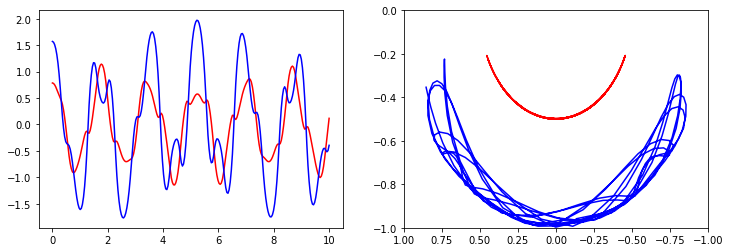

In [20]:
# plot the angles as a function of time

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")


x1 = + L *  np.sin(x[:, 0])
y1 = - L *  np.cos(x[:, 0])

x2 = x1 + L *  np.sin(x[:, 1])
y2 = y1 - L *  np.cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

#### Ejemplo: oscilador armónico amortiguado

Los problemas de ODE son importantes en física computacional, por lo que veremos un ejemplo más: la oscilación armónica amortiguada. Este problema está bien descrito en la página wiki: http://en.wikipedia.org/wiki/Damping

La ecuación de movimiento del oscilador amortiguado es:

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

donde $ x $ es la posición del oscilador, $ \ omega_0 $ es la frecuencia y $ \ zeta $ es la relación de amortiguación. Para escribir esta EDO de segundo orden en forma estándar, introducimos $ p = \ frac {\ mathrm {d} x} {\ mathrm {d} t} $:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

En la implementación de este ejemplo, agregaremos argumentos adicionales a la función RHS para la ODE, en lugar de usar variables globales como hicimos en el ejemplo anterior. Como consecuencia de los argumentos adicionales al RHS, necesitamos pasar un argumento de palabra clave `args` a la función `odeint`:

In [21]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [22]:
# initial state: 
y0 = [1.0, 0.0]

In [23]:
# time coodinate to solve the ODE for
t =  np.linspace(0, 10, 1000)
w0 = 2*pi*1.0

In [24]:
# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

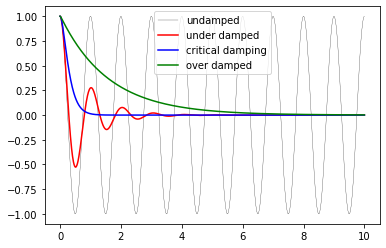

In [25]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();

## Fourier transform

Las transformadas de Fourier son una de las herramientas universales de la física computacional, que aparecen una y otra vez en diferentes contextos. SciPy proporciona funciones para acceder a la biblioteca clásica [FFTPACK] (http://www.netlib.org/fftpack/) de NetLib, que es una biblioteca FFT eficiente y bien probada escrita en FORTRAN. La API SciPy tiene algunas funciones de conveniencia adicionales, pero en general, la API está estrechamente relacionada con la biblioteca FORTRAN original.

Para usar el módulo `fftpack` en un programa Python, inclúyalo usando:

In [26]:
from numpy.fft import fftfreq
from scipy.fftpack import *

Para demostrar cómo hacer una transformada rápida de Fourier con SciPy, veamos la FFT de la solución al oscilador amortiguado de la sección anterior:

In [27]:
N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

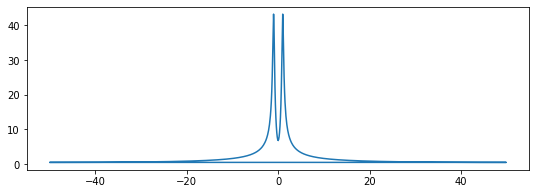

In [28]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F));

Dado que la señal es real, el espectro es simétrico. Por lo tanto, solo necesitamos trazar la parte que corresponde a las frecuencias positivas. Para extraer esa parte de `w` y` F` podemos usar algunos de los trucos de indexación para matrices NumPy que vimos en la lección 2:

In [29]:
indices =  np.where(w > 0) # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

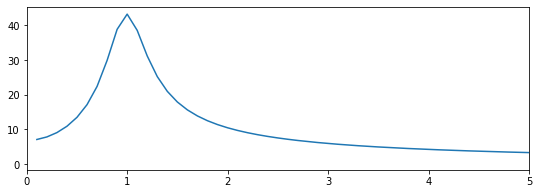

In [30]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 5);

Como era de esperar, ahora vemos un pico en el espectro que se centra alrededor de 1, que es la frecuencia que usamos en el ejemplo del oscilador amortiguado.

### Sparse matrices

Las matrices dispersas suelen ser útiles en simulaciones numéricas que tratan con sistemas grandes, si el problema se puede describir en forma de matriz donde las matrices o vectores contienen en su mayoría ceros. Scipy tiene un buen soporte para matrices dispersas, con operaciones básicas de álgebra lineal (como resolución de ecuaciones, cálculos de valores propios, etc.).

Hay muchas estrategias posibles para almacenar matrices dispersas de manera eficiente. Algunos de los más comunes son el llamado formulario de coordenadas (COO), formulario de lista de lista (LIL) y CSC de columna comprimida y dispersa (y fila, CSR). Cada formato tiene algunas ventajas y desventajas. La mayoría de los algoritmos computacionales (resolución de ecuaciones, multiplicación de matriz-matriz, etc.) se pueden implementar de manera eficiente usando formatos CSR o CSC, pero no son tan intuitivos ni tan fáciles de inicializar. Muy a menudo, una matriz dispersa se crea inicialmente en formato COO o LIL (donde podemos agregar elementos de manera eficiente a los datos de la matriz dispersa), y luego se convierte a CSC o CSR antes de usarse en cálculos reales.

Para obtener más información sobre estos formatos dispersos, consulte p. Ej. http://en.wikipedia.org/wiki/Sparse_matrix

Cuando creamos una matriz dispersa, tenemos que elegir en qué formato se debe almacenar. Por ejemplo,

In [31]:
from scipy.sparse import *

In [32]:
# dense matrix
M = np.array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]]); M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [33]:
# convert from dense to sparse
A = csr_matrix(M); A

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [34]:
# convert from sparse to dense
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]])

Una forma más eficiente de crear matrices dispersas: cree una matriz vacía y complete con el uso de indexación matricial (evita crear una matriz densa potencialmente grande)

In [35]:
A = lil_matrix((4,4)) # empty 4x4 sparse matrix
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in List of Lists format>

In [36]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

Conversión entre diferentes formatos de matriz dispersa:

In [37]:
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in List of Lists format>

In [38]:
A = csr_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [39]:
A = csc_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

Podemos calcular con matrices dispersas como con matrices densas:

In [40]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [41]:
(A * A).todense()

matrix([[1., 0., 0., 0.],
        [0., 9., 0., 0.],
        [0., 4., 1., 0.],
        [2., 0., 0., 1.]])

In [42]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [43]:
A.dot(A).todense()

matrix([[1., 0., 0., 0.],
        [0., 9., 0., 0.],
        [0., 4., 1., 0.],
        [2., 0., 0., 1.]])

In [44]:
v = np.array([1,2,3,4])[:,newaxis]; v

array([[1],
       [2],
       [3],
       [4]])

In [45]:
# sparse matrix - dense vector multiplication
A * v

array([[1.],
       [6.],
       [5.],
       [5.]])

In [46]:
# same result with dense matrix - dense vector multiplcation
A.todense() * v

matrix([[1.],
        [6.],
        [5.],
        [5.]])

## Optimization

La optimización (encontrar mínimos o máximos de una función) es un campo amplio en matemáticas, y la optimización de funciones complicadas o en muchas variables puede estar bastante involucrada. Aquí solo veremos algunos casos muy simples. Para obtener una introducción más detallada a la optimización con SciPy, consulte: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

Para usar el módulo de optimización en scipy, primero incluya el módulo `optimize`:

In [47]:
from scipy import optimize

### Encontrar un mínimo

Primero veamos cómo encontrar los mínimos de una función simple de una sola variable:

In [48]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

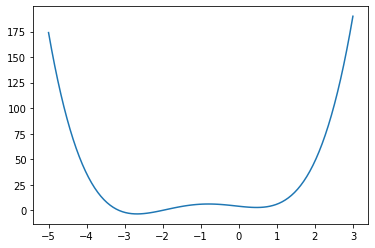

In [49]:
fig, ax  = plt.subplots()
x =  np.linspace(-5, 3, 100)
ax.plot(x, f(x));

Podemos usar la función `fmin_bfgs` para encontrar los mínimos de una función:

In [50]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.67298155])

In [51]:
optimize.fmin_bfgs(f, 0.5) 

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 5


array([0.46961745])

También podemos usar las funciones `brent` o` fminbound`. Tienen una sintaxis un poco diferente y usan diferentes algoritmos.

In [52]:
optimize.brent(f)

0.46961743402759754

In [53]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### Encontrar una solución a una función

Para encontrar la raíz de una función de la forma $ f (x) = 0 $ podemos usar la función `fsolve`. Requiere una suposición inicial:

In [54]:
omega_c = 3.0
def f(omega):
    # a transcendental equation: resonance frequencies of a low-Q SQUID terminated microwave resonator
    return np.tan(2*pi*omega) - omega_c/omega

<ipython-input-54-64c57d5fd427>:4: RuntimeWarning: divide by zero encountered in true_divide
  return np.tan(2*pi*omega) - omega_c/omega


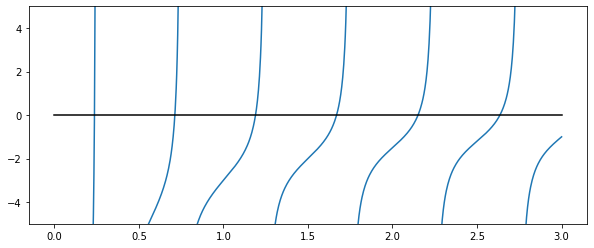

In [55]:
fig, ax  = plt.subplots(figsize=(10,4))
x =  np.linspace(0, 3, 1000)
y = f(x)
mask =  np.where(abs(y) > 50)
x[mask] = y[mask] = NaN # get rid of vertical line when the function flip sign
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [56]:
optimize.fsolve(f, 0.1)

array([0.23743014])

In [57]:
optimize.fsolve(f, 0.6)

array([0.71286972])

In [58]:
optimize.fsolve(f, 1.1)

array([1.18990285])

## Interpolation

La interpolación es simple y conveniente en scipy: la función `interp1d`, cuando se dan matrices que describen datos $X$ e $Y$, devuelve un objeto que se comporta como una función que se puede llamar para un valor arbitrario de $x$ (en el rango cubierto por $X$), y devuelve el valor de $y$ interpolado correspondiente:

In [59]:
from scipy.interpolate import *

In [60]:
def f(x):
    return np.sin(x)

In [61]:
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

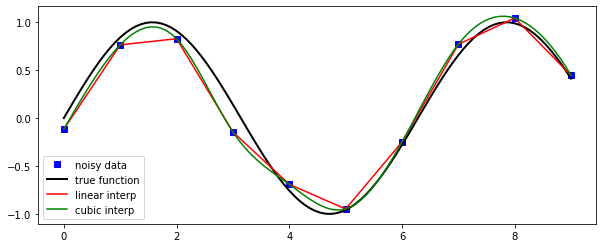

In [62]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

## Statistics

El módulo `scipy.stats` contiene una gran cantidad de distribuciones estadísticas, funciones estadísticas y pruebas. Para obtener una documentación completa de sus funciones, consulte http://docs.scipy.org/doc/scipy/reference/stats.html.

También hay un paquete de Python muy poderoso para modelado estadístico llamado statsmodels. Consulte http://statsmodels.sourceforge.net para obtener más detalles.

In [63]:
from scipy import stats

In [64]:
# create a (discreet) random variable with poissionian distribution

X = stats.poisson(3.5) # photon distribution for a coherent state with n=3.5 photons

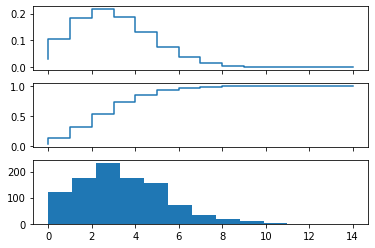

In [65]:
n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))

# plot the commulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

In [66]:
# create a (continous) random variable with normal distribution
Y = stats.norm()

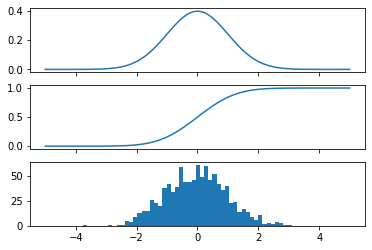

In [67]:
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

**Estadísticas**

In [68]:
X.mean(), X.std(), X.var() # poission distribution

(3.5, 1.8708286933869707, 3.5)

In [69]:
Y.mean(), Y.std(), Y.var() # normal distribution

(0.0, 1.0, 1.0)

### Statistical tests

Pruebe si dos conjuntos de datos aleatorios (independientes) provienen de la misma distribución:

In [70]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print (f"t-statistic = {t_statistic}")
print(f"p-value = {p_value}")

t-statistic = -0.3175173118125565
p-value = 0.7508842832858349


Dado que el valor $p$ es muy grande, no podemos rechazar la hipótesis de que los dos conjuntos de datos aleatorios tienen medias * diferentes *.

Para probar si la media de una sola muestra de datos tiene una media de 0,1 (la media verdadera es 0,0):

In [71]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

Ttest_1sampResult(statistic=-3.3260245451111463, pvalue=0.0009130194599003766)

Un valor $p$ bajo significa que podemos rechazar la hipótesis de que la media de $Y$ es 0,1.

In [72]:
Y.mean()

0.0

In [73]:
stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

Ttest_1sampResult(statistic=0.7254565446907949, pvalue=0.468341895612603)

## Referencias

* [A tutorial on how to get started using SciPy](http://docs.scipy.org/doc/scipy/reference/tutorial/index.html) 
*  [The SciPy source code](https://github.com/scipy/scipy/)